In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [5]:
df.dtypes
# There is no object dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

# Rename columns

In [11]:
df = df.rename(columns={"sepal length (cm)": "s_l", "sepal width (cm)": "s_w", 
                   "petal length (cm)": "p_l", "petal width (cm)": "p_w", "target":"class"})
df.head()

,s_l,s_w,p_l,p_w,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<AxesSubplot:xlabel='s_l', ylabel='s_w'>

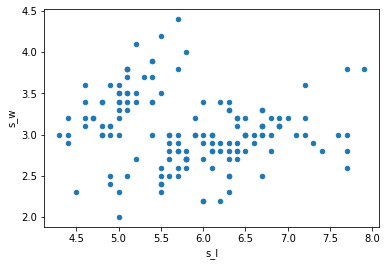

In [12]:
df.plot.scatter(x='s_l',  y= 's_w')

array([[<AxesSubplot:xlabel='s_l', ylabel='s_l'>,
        <AxesSubplot:xlabel='s_w', ylabel='s_l'>,
        <AxesSubplot:xlabel='p_l', ylabel='s_l'>,
        <AxesSubplot:xlabel='p_w', ylabel='s_l'>,
        <AxesSubplot:xlabel='class', ylabel='s_l'>],
       [<AxesSubplot:xlabel='s_l', ylabel='s_w'>,
        <AxesSubplot:xlabel='s_w', ylabel='s_w'>,
        <AxesSubplot:xlabel='p_l', ylabel='s_w'>,
        <AxesSubplot:xlabel='p_w', ylabel='s_w'>,
        <AxesSubplot:xlabel='class', ylabel='s_w'>],
       [<AxesSubplot:xlabel='s_l', ylabel='p_l'>,
        <AxesSubplot:xlabel='s_w', ylabel='p_l'>,
        <AxesSubplot:xlabel='p_l', ylabel='p_l'>,
        <AxesSubplot:xlabel='p_w', ylabel='p_l'>,
        <AxesSubplot:xlabel='class', ylabel='p_l'>],
       [<AxesSubplot:xlabel='s_l', ylabel='p_w'>,
        <AxesSubplot:xlabel='s_w', ylabel='p_w'>,
        <AxesSubplot:xlabel='p_l', ylabel='p_w'>,
        <AxesSubplot:xlabel='p_w', ylabel='p_w'>,
        <AxesSubplot:xlabel='class', ylab

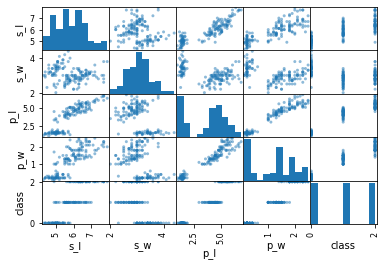

In [13]:
scatter_matrix(df, alpha=0.5)

In [14]:
df.corr()

,s_l,s_w,p_l,p_w,class
s_l,1.000000,-0.117570,0.871754,0.817941,0.782561
s_w,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
p_l,0.871754,-0.428440,1.000000,0.962865,0.949035
p_w,0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [15]:
df.isnull()

,s_l,s_w,p_l,p_w,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [16]:
df.isnull().sum()

s_l      0
s_w      0
p_l      0
p_w      0
class    0
dtype: int64

# droping rows containing missing values

In [ ]:
df.loc[0, 's_length'] = np.nan
df.head()

In [19]:
df = df.dropna()
df

,s_l,s_w,p_l,p_w,class
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# filling in missing values with mean of column

In [18]:
df.loc[0, 's_l'] = np.nan
df.head()

,s_l,s_w,p_l,p_w,class
0,NaN,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
s=df['s_l'].mean()
print(s)

In [ ]:
df.fillna(s)

# Creating new feature

In [20]:
new_df = pd.DataFrame()
new_df['length'] = df['p_l'] + df['s_l']
new_df['width'] = df['p_w'] + df['s_w']
new_df.head()

,length,width
1,6.3,3.2
2,6.0,3.4
3,6.1,3.3
4,6.4,3.8
5,7.1,4.3
